In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize":[5,5]})

In [2]:
df = pd.read_csv("Houses prices.csv")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.shape # the data is fairly smal

(4600, 18)

### Let\`t do some EDA + ELT

In [3]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [7]:
df["street"].value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
13516 164th Ave SE       2
35229 SE Terrace St      2
11807 NE 105th Ct        2
                        ..
18119 NE 30th St         1
2855 36th Ave W          1
2234 167th Ave SE        1
331 22nd Ave E           1
19211 SE 342nd St        1
Name: street, Length: 4525, dtype: int64

In [8]:
df["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [9]:
df["country"].value_counts()

USA    4600
Name: country, dtype: int64

## The target feature is price

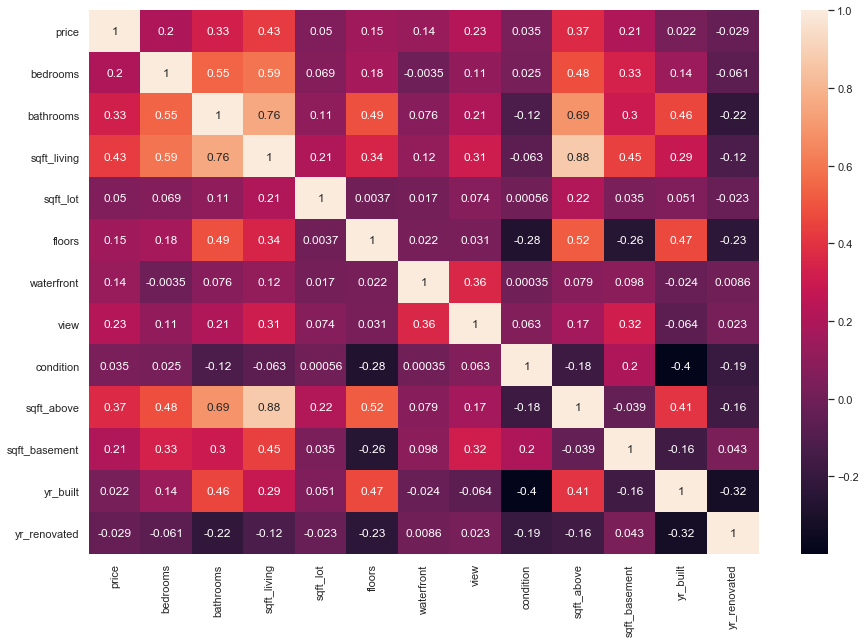

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

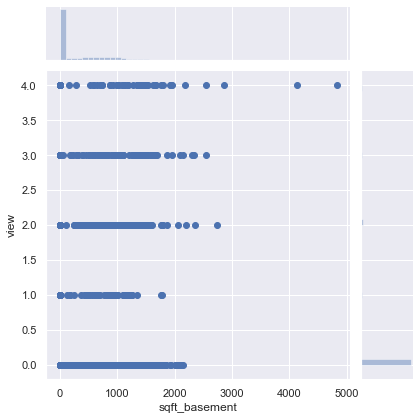

In [11]:
sns.jointplot(df["sqft_basement"], df["view"])

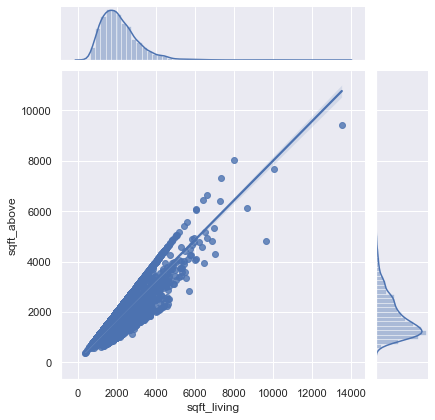

In [12]:
sns.jointplot(df["sqft_living"], df["sqft_above"], kind="reg")
# stromg linear correlation

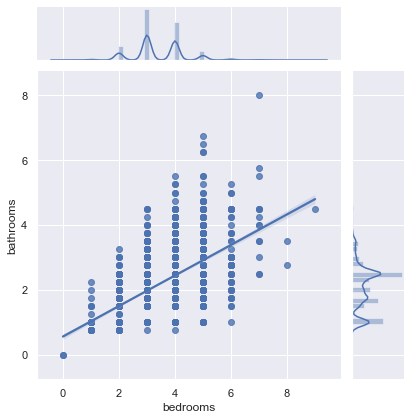

In [13]:
# sns.jointplot(df["sqft_above"], df["bathrooms"], kind="reg")
sns.jointplot(df["bedrooms"], df["bathrooms"], kind="reg")

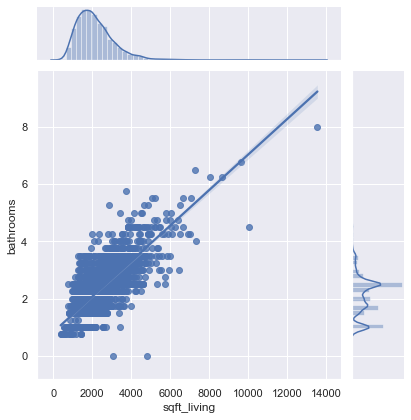

In [14]:
sns.jointplot(df["sqft_living"], df["bathrooms"], kind="reg")

,sqft_lot,price
sqft_lot,1.000000,0.050451
price,0.050451,1.000000


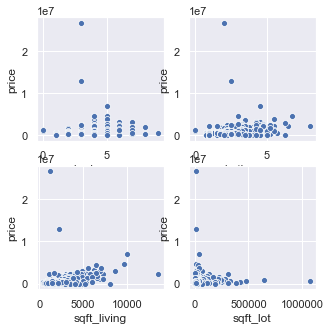

In [15]:
plt.subplot(221)
df["bedrooms"].value_counts()
sns.scatterplot(df["bedrooms"], df["price"])
df[["bedrooms","price"]].corr() # weak correlation.


plt.subplot(222)
df["bathrooms"].value_counts()
sns.scatterplot(df["bathrooms"], df["price"])
# 2.5 bathroom! how can a house had 2.5 or 1.75 bathrooms.....
# outliers
df[["bathrooms","price"]].corr() # 0.32 of correalation not bad!

plt.subplot(223)
df["sqft_living"].value_counts()
sns.scatterplot(df["sqft_living"], df["price"])
df[["sqft_living","price"]].corr()

plt.subplot(224)
df["sqft_lot"].value_counts()
sns.scatterplot(df["sqft_lot"], df["price"])
df[["sqft_lot","price"]].corr() # almost no correlation at all

,floors,price
floors,1.000000,0.151461
price,0.151461,1.000000


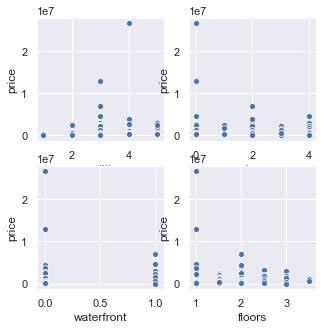

In [16]:
plt.subplot(221)
df["condition"].value_counts()
sns.scatterplot(df["condition"], df["price"])
df[["condition","price"]].corr() # almost no correlation at all

plt.subplot(222)
df["view"].value_counts()
sns.scatterplot(df["view"], df["price"])
df[["view","price"]].corr() # almost no correlation at all

plt.subplot(223)
df["waterfront"].value_counts()
sns.scatterplot(df["waterfront"], df["price"])
df[["waterfront","price"]].corr() # almost no correlation at all

plt.subplot(224)
df["floors"].value_counts()
sns.scatterplot(df["floors"], df["price"])
df[["floors","price"]].corr() # almost no correlation at all

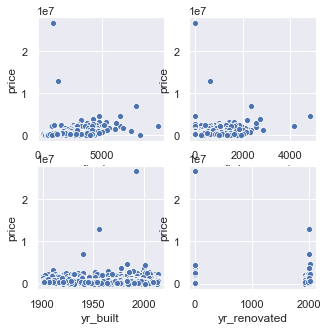

In [17]:
plt.subplot(221)
df["sqft_above"].value_counts()
sns.scatterplot(df["sqft_above"], df["price"])

plt.subplot(222)
df["sqft_basement"].value_counts()
sns.scatterplot(df["sqft_basement"], df["price"])

plt.subplot(223)
df["yr_built"].value_counts()
sns.scatterplot(df["yr_built"], df["price"])

plt.subplot(224)
df["yr_renovated"].value_counts()
sns.scatterplot(df["yr_renovated"], df["price"])

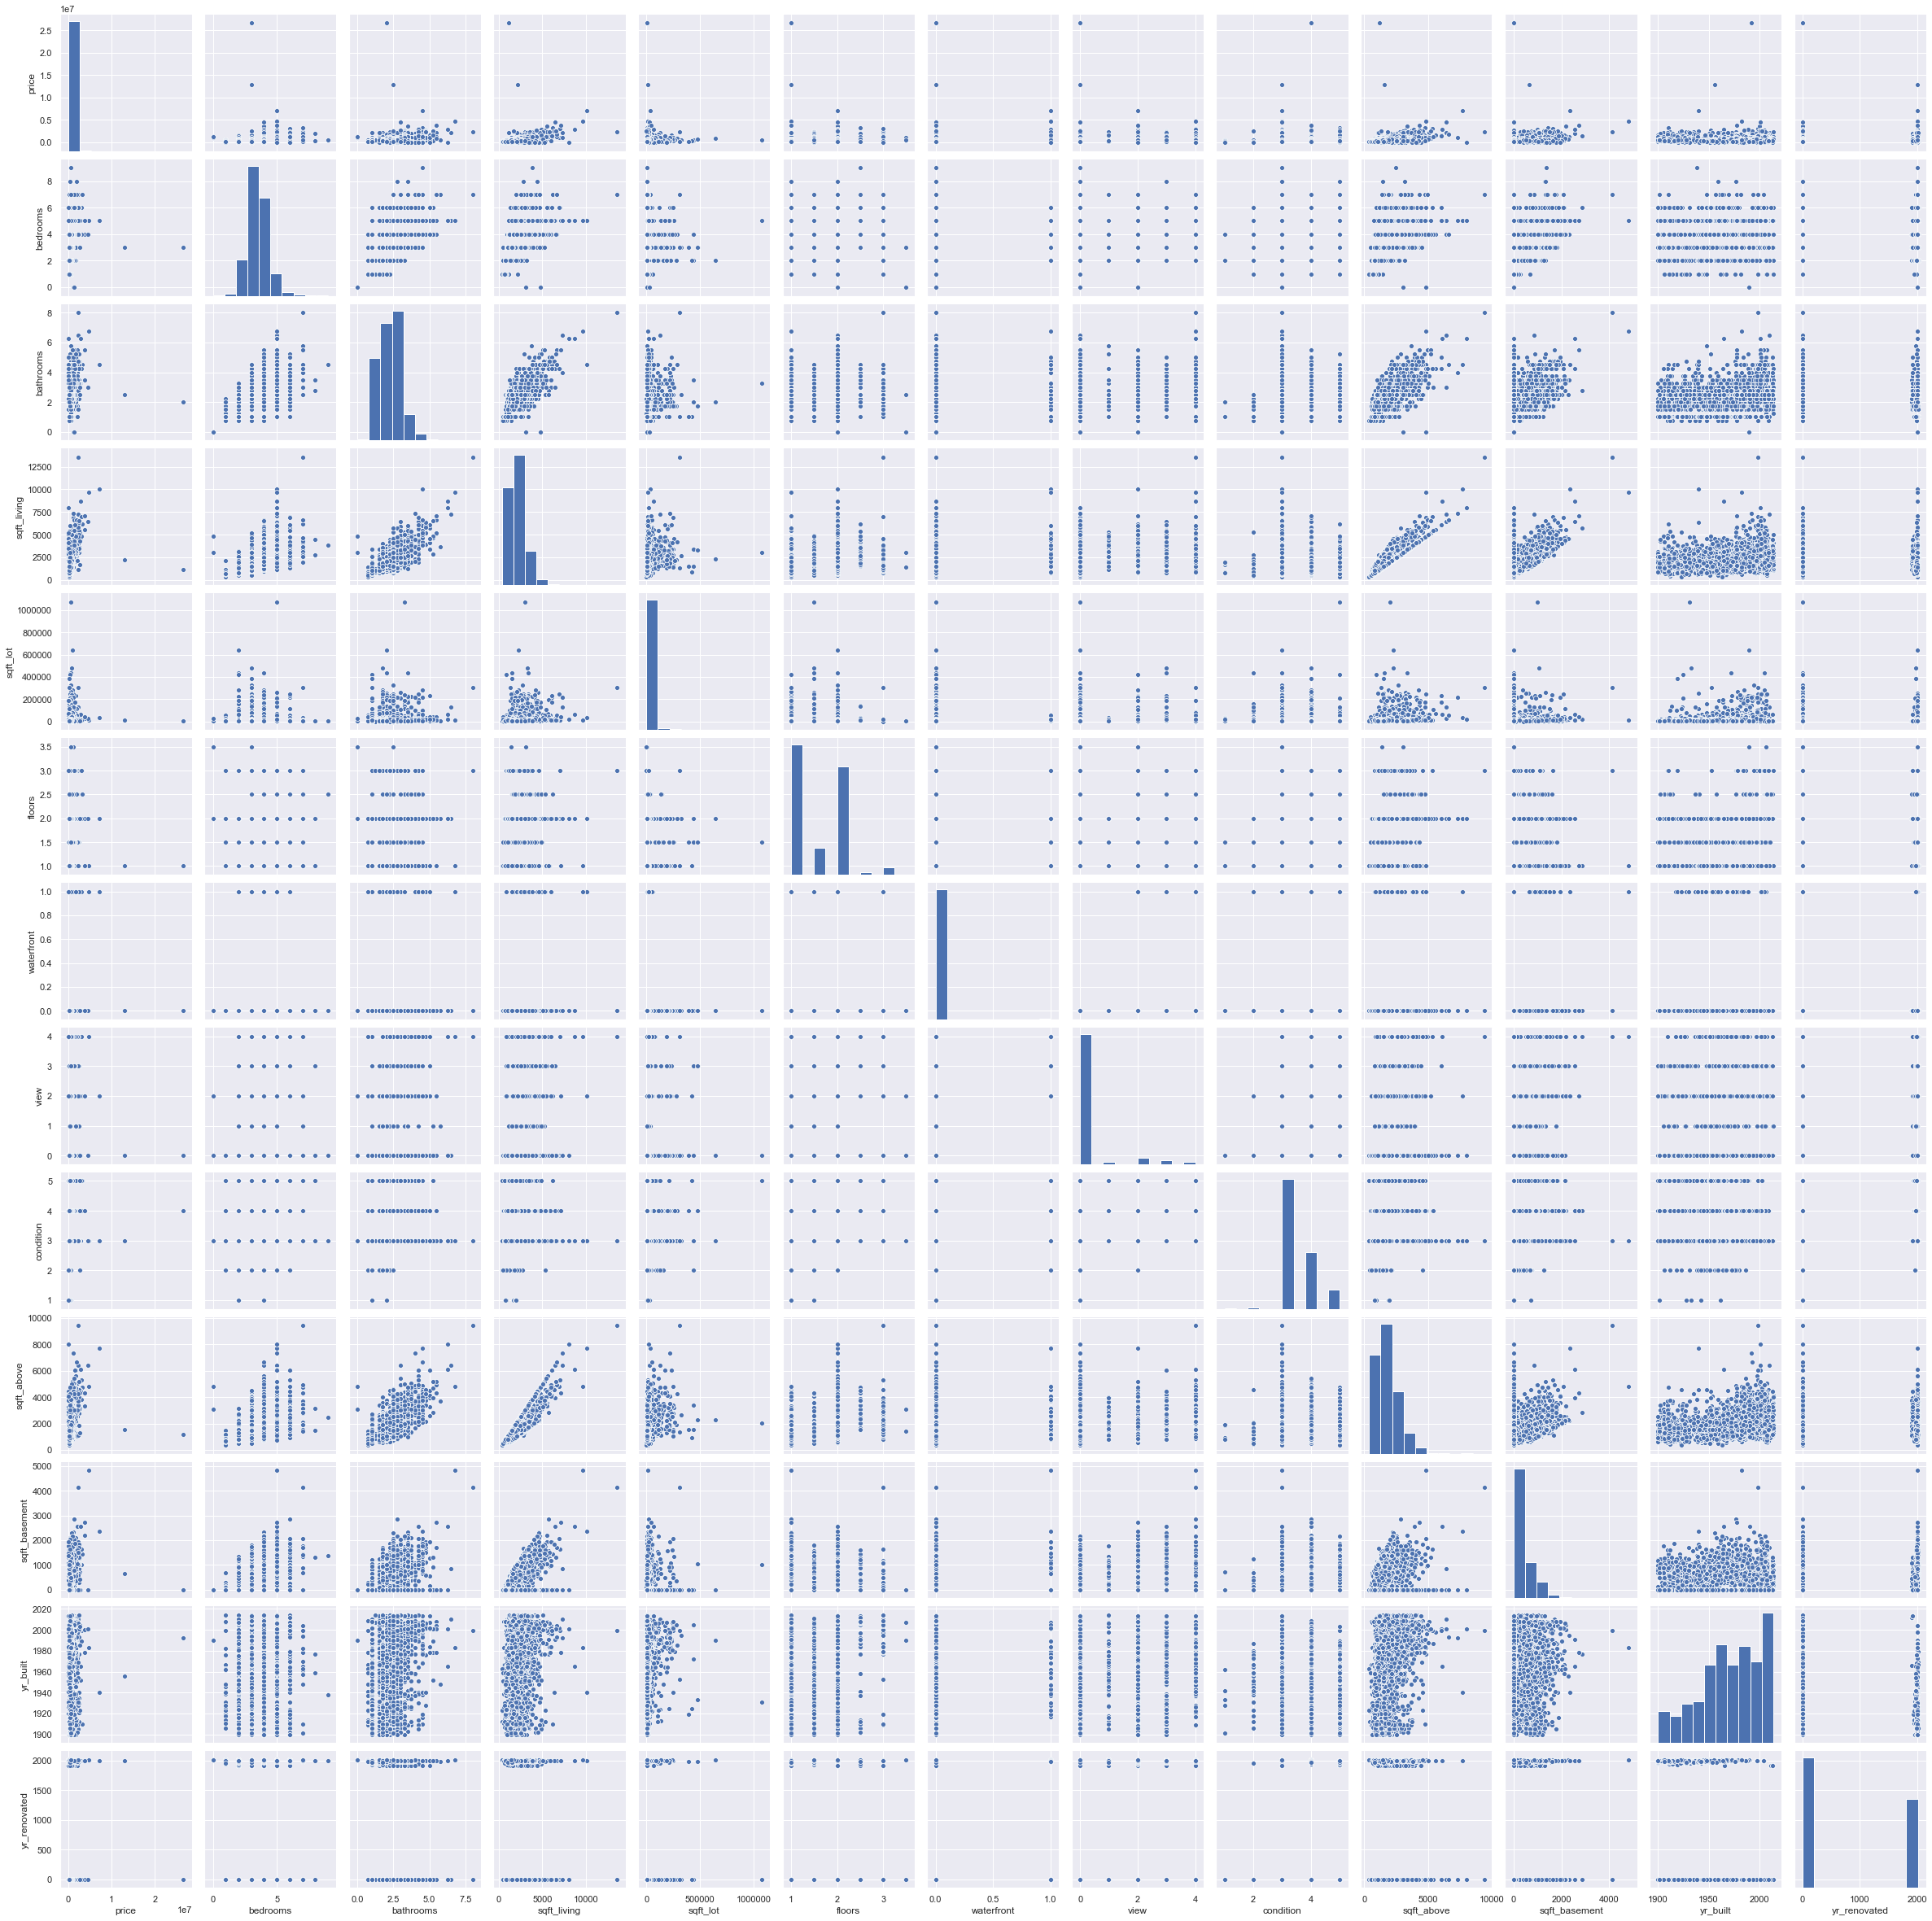

In [18]:
sns.pairplot(df)

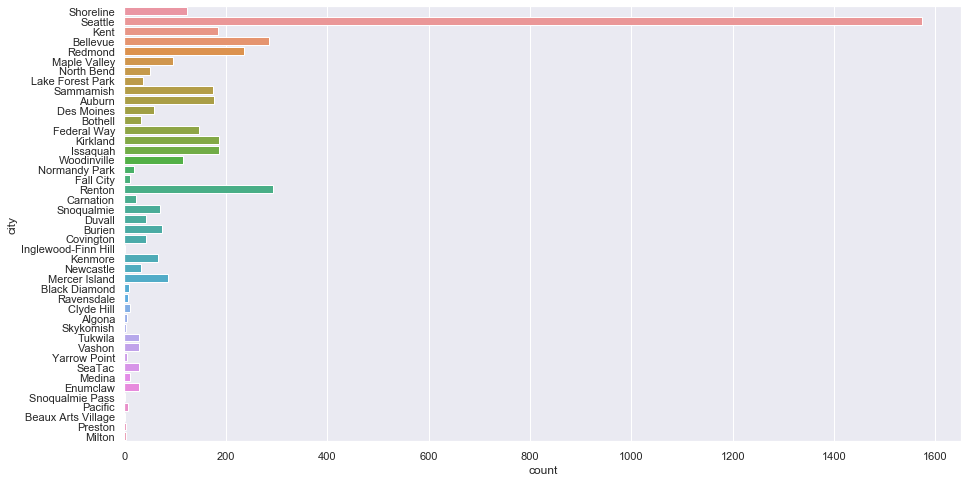

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(y = df["city"])

**Drop columns**

In [3]:
df.drop(["yr_renovated","condition", "sqft_lot", "view" , "sqft_basement", "country", "street", "city", "statezip", 
"sqft_above", ],axis=1, inplace=True)

In [64]:
# yr_built == year built of a house
# sqft_living == square feet of living

In [4]:
df.price.min()
df.drop(index = df[df["price"] == df["price"].min()].index , inplace=True)

In [65]:
df.shape

(4551, 8)

In [62]:
df[df["price"] == df["price"].min()]
# delete these rows forever since the price is 0`s

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built
4351,2014-05-06 00:00:00,7800.0,2.0,1.0,780,1.0,0,1942


In [5]:
df["date"].unique()

array(['2014-05-02T00:00:00.000000000', '2014-05-03T00:00:00.000000000',
       '2014-05-04T00:00:00.000000000', '2014-05-05T00:00:00.000000000',
       '2014-05-06T00:00:00.000000000', '2014-05-07T00:00:00.000000000',
       '2014-05-08T00:00:00.000000000', '2014-05-09T00:00:00.000000000',
       '2014-05-10T00:00:00.000000000', '2014-05-11T00:00:00.000000000',
       '2014-05-12T00:00:00.000000000', '2014-05-13T00:00:00.000000000',
       '2014-05-14T00:00:00.000000000', '2014-05-15T00:00:00.000000000',
       '2014-05-16T00:00:00.000000000', '2014-05-17T00:00:00.000000000',
       '2014-05-18T00:00:00.000000000', '2014-05-19T00:00:00.000000000',
       '2014-05-20T00:00:00.000000000', '2014-05-21T00:00:00.000000000',
       '2014-05-22T00:00:00.000000000', '2014-05-23T00:00:00.000000000',
       '2014-05-24T00:00:00.000000000', '2014-05-25T00:00:00.000000000',
       '2014-05-26T00:00:00.000000000', '2014-05-27T00:00:00.000000000',
       '2014-05-28T00:00:00.000000000', '2014-05-29

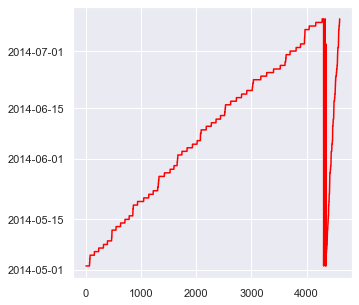

In [184]:
df["date"].plot(kind="line", color="red")

In [73]:
df.iloc[4000:].head(3) # these are the data of that declined curve from this period

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built
4000,2014-07-07,443000.0,5.0,1.75,1650,1.5,0,1902
4001,2014-07-07,575000.0,4.0,2.50,2400,2.0,0,1990
4002,2014-07-07,245000.0,2.0,1.00,1500,1.0,0,1926


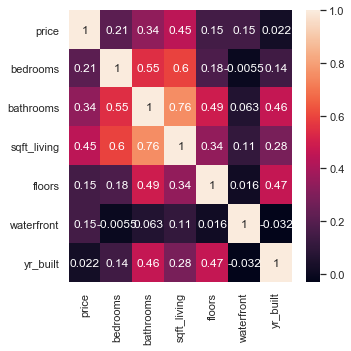

In [76]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.drop(["date", "street","city","statezip","country","floors","waterfront","view", "condition", "sqft_above", "yr_built","yr_renovated"], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [10]:
df.drop("price", axis=1)

,date,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built
0,2014-05-02 00:00:00,3.0,1.50,1340,1.5,0,1955
1,2014-05-02 00:00:00,5.0,2.50,3650,2.0,0,1921
2,2014-05-02 00:00:00,3.0,2.00,1930,1.0,0,1966
3,2014-05-02 00:00:00,3.0,2.25,2000,1.0,0,1963
4,2014-05-02 00:00:00,4.0,2.50,1940,1.0,0,1976
...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.0,1.75,1510,1.0,0,1954
4596,2014-07-09 00:00:00,3.0,2.50,1460,2.0,0,1983
4597,2014-07-09 00:00:00,3.0,2.50,3010,2.0,0,2009
4598,2014-07-10 00:00:00,4.0,2.00,2090,1.0,0,1974


In [11]:
X = df.drop(["price", "date"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X.columns)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X.columns)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, accuracy_score

In [42]:
models = {"RF":RandomForestRegressor(), "DT":DecisionTreeRegressor()}
for model_name, model in models.items():
    print(model_name)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    print("Train Score", model.score(X_train_scaled, y_train))
    print("Test Score",model.score(X_test_scaled, y_test))
    
    print("Mean Squared Error", mean_squared_error(y_test, predictions,squared=False))
    print("**"*20)

RF
Train Score 0.8582772935198547
Test Score 0.49906564633737227
Mean Squared Error 288538.86521138804
****************************************
DT
Train Score 0.9992500064516159
Test Score -0.332027837645249
Mean Squared Error 470511.845779321
****************************************


In [75]:
model = RandomForestRegressor(random_state=42, n_estimators= 1500, max_samples=len(X_train), n_jobs=-1)
model.fit(X_train, y_train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
    
print("Train Score", model.score(X_train, y_train))
print("Test Score",model.score(X_test, y_test))

Train Score 0.859390882123042
Test Score 0.5034639192714208


In [35]:
model.feature_importances_

array([0.02600674, 0.08988161, 0.25443116, 0.56345106, 0.06622943])

In [79]:
import joblib

joblib.dump(Scaler, "StandardScaler.h5") # save standard scaler
joblib.dump(model, "random forest.h5")# save the Linear Regression model
joblib.dump(X_train.columns, "Houses.h5") # save all data frame`s columns

['Houses.h5']